ACCESS-OM2 1 degree with RYF from u-cj877 ACCESS-CM2 n96 O025 run

In [24]:
import matplotlib.pyplot as plt
import datetime, numpy as np
import xarray as xr
import xarray_tools as xrt
import cartopy, cartopy.crs as ccrs
import matplotlib.cm as cm
import cosima_cookbook as cc

%matplotlib inline


In [25]:
d = xr.open_mfdataset('/scratch/p66/mrd599/access-om2/archive/1deg_cm2_ryf/output000/ocean/ocean-scalar-1-daily-ym_190*.nc')
d_jra55v14 = xr.open_mfdataset('/g/data/ik11/outputs/access-om2/1deg_jra55v14_ryf/output00[0-4]/ocean/ocean-scalar-1-daily-ym_19*.nc')


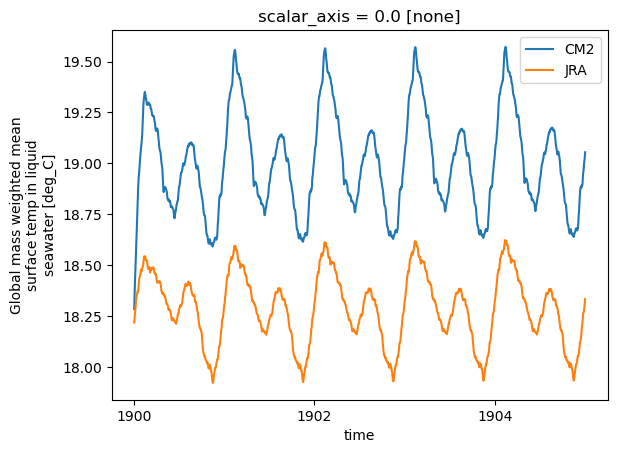

In [26]:
fig, axes = plt.subplots()
d.temp_surface_ave.plot(label='CM2')
d_jra55v14.temp_surface_ave.plot(label='JRA')
axes.legend()


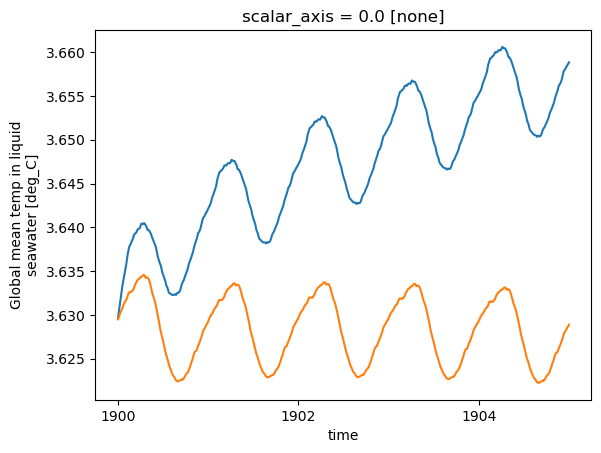

In [27]:
d.temp_global_ave.plot()
d_jra55v14.temp_global_ave.plot()


In [28]:
grid = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc')
geolon_t = grid.geolon_t
geolat_t = grid.geolat_t


In [29]:
temp = xr.open_mfdataset('/scratch/p66/mrd599/access-om2/archive/1deg_cm2_ryf/output000/ocean/ocean-2d-surface_pot_temp-1-monthly-mean-ym_19*.nc').surface_pot_temp
temp_jra55v14 = xr.open_mfdataset('/g/data/ik11/outputs/access-om2/1deg_jra55v14_ryf/output00[0-4]/ocean/ocean-2d-surface_pot_temp-1-monthly-mean-ym_19*.nc').surface_pot_temp
temp = temp.assign_coords({'geolat_t':geolat_t, 'geolon_t':geolon_t})
temp_jra55v14 = temp_jra55v14.assign_coords({'geolat_t':geolat_t, 'geolon_t':geolon_t})


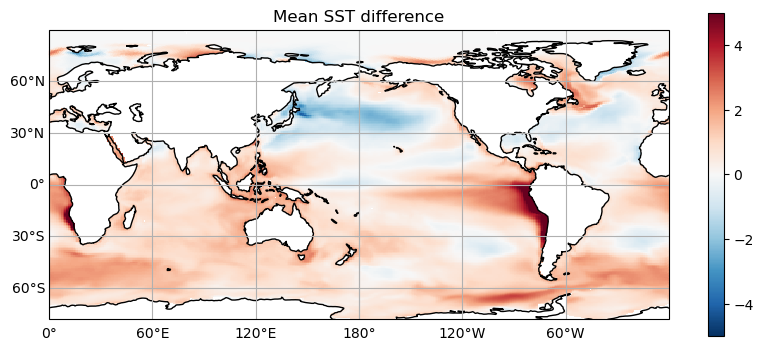

In [31]:
diff = temp-temp_jra55v14

fig = plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels=False
gl.right_labels=False
ax.coastlines(resolution='110m')
p = plt.pcolormesh(geolon_t, geolat_t, diff.mean('time'),
                   transform=ccrs.PlateCarree(), vmin=-5, vmax=5, cmap=cm.RdBu_r)
ax.set_title('Mean SST difference')
plt.colorbar(p, shrink=0.7)


In [ ]:
fig, axes = plt.subplots()
print(d.total_ocean_swflx.mean().values)
print(d_jra55v14.total_ocean_swflx.mean().values)
d.total_ocean_swflx.plot(label='CM2')
d_jra55v14.total_ocean_swflx.plot(label='JRA')
axes.legend()


In [ ]:
d.total_ocean_lprec.plot()
d_jra55v14.total_ocean_lprec.plot()
